In [46]:
!pip install yfinance --upgrade


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import yfinance as yf

In [48]:
import pandas as pd


In [49]:
!pip install textblob --upgrade


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
from textblob import TextBlob


In [22]:
!pip install  GoogleNews --upgrade

  Using cached GoogleNews-1.6.15-py3-none-any.whl.metadata (4.5 kB)

   ---------------------------------------- 0/3 [tzlocal]
   ------------- -------------------------- 1/3 [dateparser]
   ------------- -------------------------- 1/3 [dateparser]
   ------------- -------------------------- 1/3 [dateparser]
   ------------- -------------------------- 1/3 [dateparser]
   ------------- -------------------------- 1/3 [dateparser]
   ------------- -------------------------- 1/3 [dateparser]
   ------------- -------------------------- 1/3 [dateparser]
   ------------- -------------------------- 1/3 [dateparser]
   ------------- -------------------------- 1/3 [dateparser]
   ------------- -------------------------- 1/3 [dateparser]
   ------------- -------------------------- 1/3 [dateparser]
   ------------- -------------------------- 1/3 [dateparser]
   ------------- -------------------------- 1/3 [dateparser]
   ------------- -------------------------- 1/3 [dateparser]
   ------------- --


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from GoogleNews import GoogleNews


In [51]:
import matplotlib.pyplot as plt


In [25]:
import seaborn as sns


In [26]:
print("📥 Step 1: Collecting Apple stock data...")
data = yf.download("AAPL", start="2020-01-01", end="2025-11-25")
data.reset_index(inplace=True)

📥 Step 1: Collecting Apple stock data...


C:\Users\TS\AppData\Local\Temp\ipykernel_856\1577882636.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2025-11-25")
[*********************100%***********************]  1 of 1 completed


In [27]:
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)

data.to_csv("stock_data.csv", index=False)
print("✅ Step 1 Completed: stock_data.csv saved successfully.\n")


✅ Step 1 Completed: stock_data.csv saved successfully.



In [31]:
import pandas as pd
df = pd.read_csv("stock_data.csv")
df.head()
 

,Date,Close,High,Low,Open,Volume
0,2020-01-02,72.468246,72.528566,71.223244,71.476585,135480400
1,2020-01-03,71.763741,72.523769,71.539352,71.696183,146322800
2,2020-01-06,72.335579,72.374185,70.634562,70.885494,118387200
3,2020-01-07,71.995377,72.600983,71.775811,72.345227,108872000
4,2020-01-08,73.153496,73.455095,71.698581,71.698581,132079200


In [32]:
import pandas as pd

df = pd.read_csv("stock_data.csv")
df.tail()


,Date,Close,High,Low,Open,Volume
1478,2025-11-18,267.440002,270.709991,265.320007,269.989990,45677300
1479,2025-11-19,268.559998,272.209991,265.500000,265.529999,40424500
1480,2025-11-20,266.250000,275.429993,265.920013,270.829987,45823600
1481,2025-11-21,271.489990,273.329987,265.670013,265.950012,59030800
1482,2025-11-24,275.920013,277.000000,270.899994,270.899994,65504400


In [34]:
print("🧹 Step 2: Cleaning data and collecting news sentiment...")


🧹 Step 2: Cleaning data and collecting news sentiment...


In [35]:
data.fillna(method="ffill", inplace=True)

C:\Users\TS\AppData\Local\Temp\ipykernel_856\3219607963.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method="ffill", inplace=True)


In [36]:
#  Collect Apple-related news sentiment
print("📰 Collecting and analyzing Apple-related news sentiment...")
googlenews = GoogleNews(lang='en')
googlenews.search('Apple Stock')
news = googlenews.result()

news_df = pd.DataFrame(news)
if not news_df.empty:
    news_df["Date"] = pd.to_datetime(news_df["date"], errors="coerce")
    news_df["Sentiment"] = news_df["title"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    daily_sentiment = news_df.groupby(news_df["Date"].dt.date)["Sentiment"].mean().reset_index()
    daily_sentiment.rename(columns={"Date": "Date", "Sentiment": "Sentiment"}, inplace=True)
else:
    # fallback in case GoogleNews gives no data
    daily_sentiment = pd.DataFrame({"Date": data["Date"], "Sentiment": 0})

📰 Collecting and analyzing Apple-related news sentiment...


C:\Users\TS\AppData\Local\Temp\ipykernel_856\1491728237.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  news_df["Date"] = pd.to_datetime(news_df["date"], errors="coerce")


In [37]:
data["Date"] = pd.to_datetime(data["Date"]).dt.date
daily_sentiment["Date"] = pd.to_datetime(daily_sentiment["Date"]).dt.date

In [38]:
# ✅ Merge stock and sentiment data
merged = pd.merge(data, daily_sentiment, on="Date", how="left")
merged["Sentiment"].fillna(0, inplace=True)
merged.to_csv("clean_data.csv", index=False)
print("✅ Step 2 Completed: clean_data.csv (with Sentiment) saved.\n")


✅ Step 2 Completed: clean_data.csv (with Sentiment) saved.



C:\Users\TS\AppData\Local\Temp\ipykernel_856\501352773.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged["Sentiment"].fillna(0, inplace=True)


In [39]:
print("📊 Step 3: Performing Exploratory Data Analysis...")


📊 Step 3: Performing Exploratory Data Analysis...


In [42]:
# 1️⃣ Price over time
plt.figure(figsize=(10, 5))
plt.plot(merged["Date"], merged["Close"], color='blue')
plt.title("Apple Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.tight_layout()
plt.savefig("price_plot.png")
plt.close()


In [41]:
# 2️⃣ Price distribution
plt.figure(figsize=(7, 4))
sns.histplot(merged["Close"], bins=30, kde=True)
plt.title("Distribution of Apple Stock Prices")
plt.xlabel("Close Price ($)")
plt.tight_layout()
plt.savefig("price_distribution.png")
plt.close()

In [43]:
# 3️⃣ Sentiment vs Price
plt.figure(figsize=(10, 5))
plt.scatter(merged["Sentiment"], merged["Close"], color='green', alpha=0.6)
plt.title("Relationship Between News Sentiment and Stock Price")
plt.xlabel("Sentiment Score")
plt.ylabel("Close Price ($)")
plt.tight_layout()
plt.savefig("sentiment_plot.png")
plt.close()


In [44]:
# 4️⃣ Correlation heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(merged[["Open", "High", "Low", "Close", "Volume", "Sentiment"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.close()

In [45]:
print("✅ Step 3 Completed Successfully!")
print("\n📂 Files generated:")
print("📄 stock_data.csv")
print("📄 clean_data.csv")
print("📊 price_plot.png")
print("📈 price_distribution.png")
print("💬 sentiment_plot.png")
print("🔥 correlation_heatmap.png")



✅ Step 3 Completed Successfully!

📂 Files generated:
📄 stock_data.csv
📄 clean_data.csv
📊 price_plot.png
📈 price_distribution.png
💬 sentiment_plot.png
🔥 correlation_heatmap.png


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Read clean data
data = pd.read_csv("clean_data.csv")

# Convert date to datetime
data["Date"] = pd.to_datetime(data["Date"])

# Features (X) and target (y)
X = data[["Open", "High", "Low", "Volume", "Sentiment"]]
y = data["Close"]


In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [55]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [56]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 180.81068981114714
R² Score: 0.5893452675562476


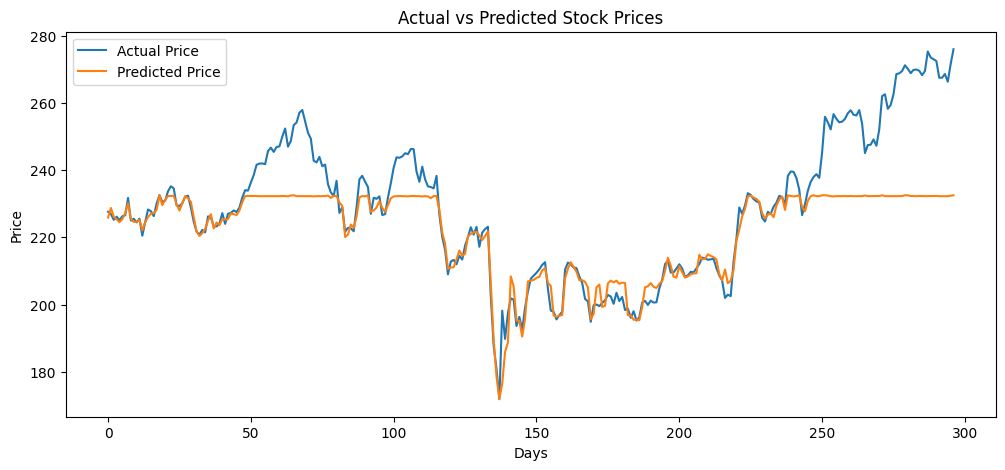

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label="Actual Price")
plt.plot(y_pred, label="Predicted Price")
plt.legend()
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()


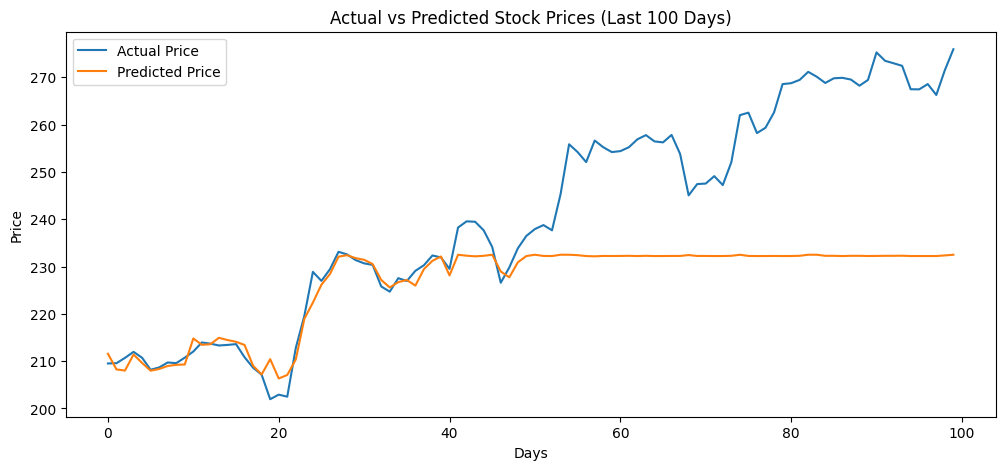

In [58]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[-100:], label="Actual Price")
plt.plot(y_pred[-100:], label="Predicted Price")
plt.legend()
plt.title("Actual vs Predicted Stock Prices (Last 100 Days)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()


In [59]:
!pip install prophet --upgrade


   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   -----------------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



📈 توقعات الشهر القادم + الاتجاه:

           Date  Predicted_Close Direction
1483 2025-11-25       247.939825     Start
1484 2025-11-26       248.095356        Up
1485 2025-11-27       248.273810        Up
1486 2025-11-28       248.627150        Up
1487 2025-11-29       249.850596        Up
1488 2025-11-30       250.126228        Up
1489 2025-12-01       249.563619      Down
1490 2025-12-02       249.738970        Up
1491 2025-12-03       250.004077        Up
1492 2025-12-04       250.282009        Up
1493 2025-12-05       250.721609        Up
1494 2025-12-06       252.015210        Up
1495 2025-12-07       252.342299        Up
1496 2025-12-08       251.810207      Down
1497 2025-12-09       251.993288        Up
1498 2025-12-10       252.241925        Up
1499 2025-12-11       252.478227        Up
1500 2025-12-12       252.850551        Up
1501 2025-12-13       254.051224        Up
1502 2025-12-14       254.260188        Up
1503 2025-12-15       253.585690      Down
1504 2025-12-16    

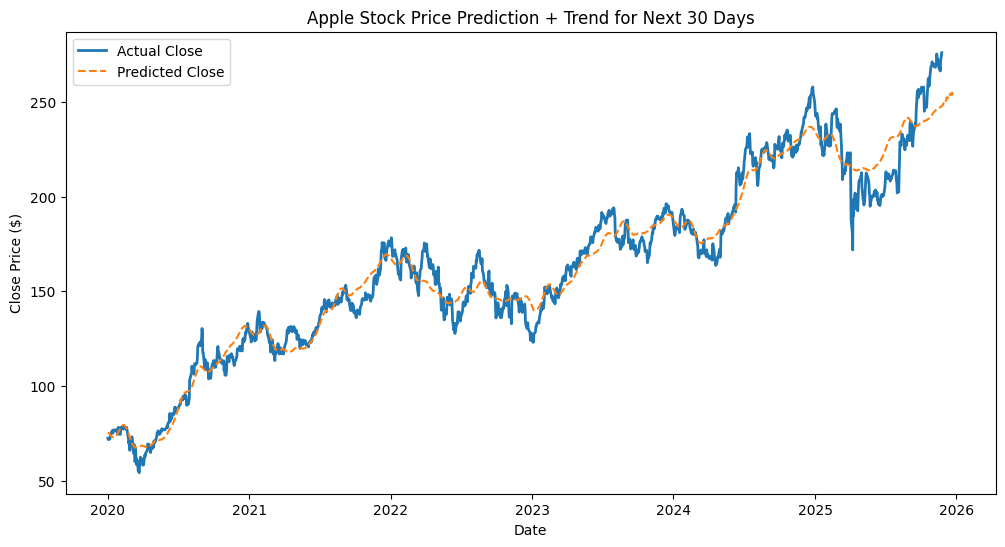

In [65]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 1️⃣ اقرأ الداتا النظيفة
data = pd.read_csv("clean_data.csv")
data["Date"] = pd.to_datetime(data["Date"])

# Prophet محتاج الأعمدة دي بالاسم ده:
df = data[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"})

# 2️⃣ إنشاء الموديل
model = Prophet(daily_seasonality=True)
model.fit(df)

# 3️⃣ التوقع لمدة 30 يوم قادم
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# ناخد آخر 30 يوم بس (المستقبل)
pred = forecast[["ds", "yhat"]].tail(30)
pred = pred.rename(columns={"ds": "Date", "yhat": "Predicted_Close"})

# 4️⃣ حساب الاتجاه (Up / Down)
pred["Direction"] = pred["Predicted_Close"].diff().apply(
    lambda x: "Up" if x > 0 else ("Down" if x < 0 else "Same")
)

# أول صف مفيش قبله مقارنة
pred.iloc[0, pred.columns.get_loc("Direction")] = "Start"

# 5️⃣ عرض النتيجة
print("\n📈 توقعات الشهر القادم + الاتجاه:\n")
print(pred)

# 6️⃣ رسم الأسعار + التوقعات
plt.figure(figsize=(12,6))
plt.plot(df["ds"], df["y"], label="Actual Close", linewidth=2)
plt.plot(forecast["ds"], forecast["yhat"], label="Predicted Close", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.title("Apple Stock Price Prediction + Trend for Next 30 Days")
plt.legend()
plt.show()
